In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [7]:
x = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']].values
y= df['Yield_kg_per_hectare'].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [12]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 531478.3125 - mae: 701.5112 - val_loss: 551948.8750 - val_mae: 716.4540
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 503013.8125 - mae: 681.4996 - val_loss: 458465.5938 - val_mae: 652.2752
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 388996.9375 - mae: 597.6697 - val_loss: 247534.0469 - val_mae: 479.6523
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183623.5312 - mae: 407.8784 - val_loss: 58113.0938 - val_mae: 225.7761
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38389.8828 - mae: 175.6044 - val_loss: 12116.2324 - val_mae: 88.6507
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11590.1133 - mae: 86.3648 - val_loss: 9258.4121 - val_mae: 77.0486
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8849.2969 - mae: 75.2393 - val_loss: 8644.6123 - val_mae: 74.3532
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8220.3535 - mae: 72.0593 - val_loss: 8156.9165 

In [13]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2775.2295 - mae: 42.8336 
Test Mean Absolute Error: 40.67


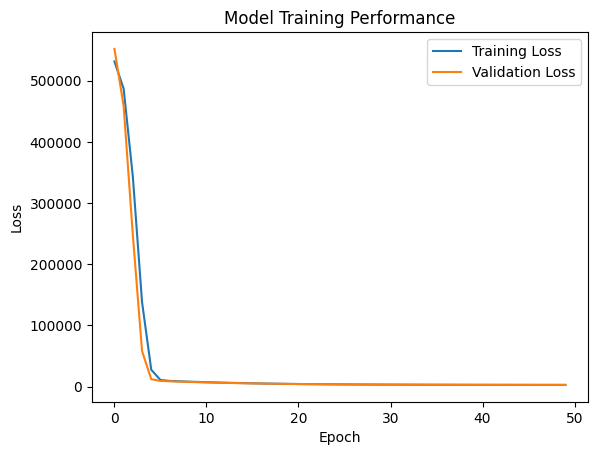

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [16]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 448.5847 ],
       [ 682.5011 ],
       [1078.1488 ],
       [ 672.6765 ],
       [ 817.1114 ],
       [ 988.6741 ],
       [ 314.7841 ],
       [ 586.2427 ],
       [ 445.07916],
       [ 797.2352 ],
       [ 609.6519 ],
       [ 677.0922 ],
       [ 625.10925],
       [ 741.81866],
       [ 848.6884 ],
       [ 685.73645],
       [ 962.8519 ],
       [ 481.83044],
       [ 586.8611 ],
       [ 368.29144],
       [ 787.6236 ],
       [ 810.07837],
       [ 367.72137],
       [ 824.45483],
       [1010.76434],
       [ 596.46643],
       [ 646.1841 ],
       [ 977.20856],
       [ 620.20276],
       [ 634.5962 ],
       [ 673.5946 ],
       [ 806.9434 ],
       [ 828.56323],
       [ 795.70636],
       [ 519.55066],
       [ 714.3876 ],
       [ 714.61   ],
       [1017.6786 ],
       [ 224.17374],
       [ 650.1809 ],
       [ 928.62085],
       [ 892.1559 ],
       [ 781.3897 ],
       [ 762.8535 ],
       [ 615.0288 ],
       [ 842.8937 ],
       [ 628.7684 ],
       [ 570.

In [17]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2775.2295 - mae: 42.8336 
Test Mean Absolute Error: 40.67


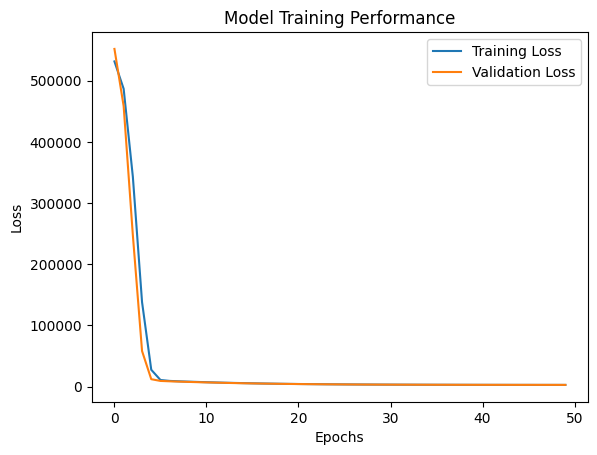

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 448.5847 ],
       [ 682.5011 ],
       [1078.1488 ],
       [ 672.6765 ],
       [ 817.1114 ],
       [ 988.6741 ],
       [ 314.7841 ],
       [ 586.2427 ],
       [ 445.07916],
       [ 797.2352 ],
       [ 609.6519 ],
       [ 677.0922 ],
       [ 625.10925],
       [ 741.81866],
       [ 848.6884 ],
       [ 685.73645],
       [ 962.8519 ],
       [ 481.83044],
       [ 586.8611 ],
       [ 368.29144],
       [ 787.6236 ],
       [ 810.07837],
       [ 367.72137],
       [ 824.45483],
       [1010.76434],
       [ 596.46643],
       [ 646.1841 ],
       [ 977.20856],
       [ 620.20276],
       [ 634.5962 ],
       [ 673.5946 ],
       [ 806.9434 ],
       [ 828.56323],
       [ 795.70636],
       [ 519.55066],
       [ 714.3876 ],
       [ 714.61   ],
       [1017.6786 ],
       [ 224.17374],
       [ 650.1809 ],
       [ 928.62085],
       [ 892.1559 ],
       [ 781.3897 ],
       [ 762.8535 ],
       [ 615.0288 ],
       [ 842.8937 ],
       [ 628.7684 ],
       [ 570.

<ipython-input-25-f8ef268e4fc8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-25-f8ef268e4fc8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


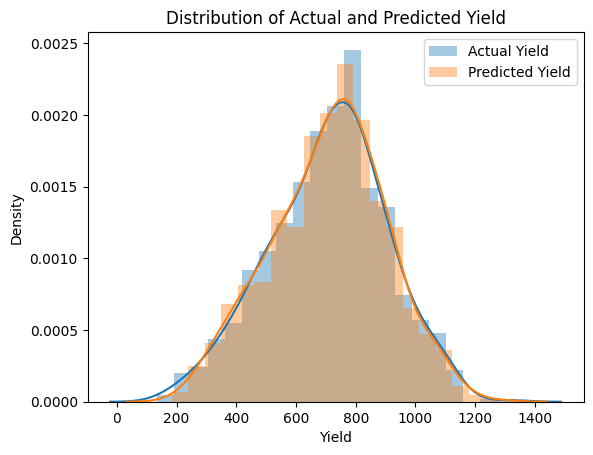

In [25]:
# Distribution plots
!pip install seaborn
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

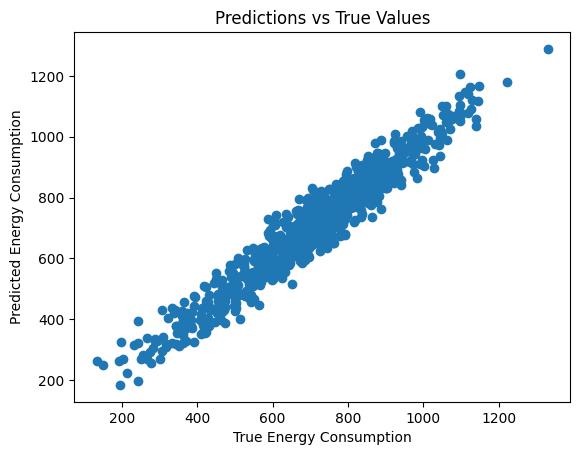

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()